In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = load_breast_cancer()

In [10]:
X = data.data

In [11]:
label = data.target

In [12]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [13]:
X.shape

(569, 30)

In [14]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [24]:
feature_names = data.feature_names

In [25]:
feature_names[5]

'mean compactness'

## Standardize the Data

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Add Some Noise

Next, add some noise to simulate random measurement error, then view the first few rows of the original and noisy features for comparison.

In [20]:
np.random.seed(42)

noise_factor = 0.5 # adjust this to control the amount of noise

X_noisy = X_scaled + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = X.shape)


# Load the original and noisy data sets into a dataFrame for comparison and visualiation
df = pd.DataFrame(X_scaled, columns = data.feature_names)
df_noisy = pd.DataFrame(X_noisy, columns = data.feature_names)

In [22]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [23]:
df_noisy.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.345421,-2.142467,1.593778,1.745890,1.451390,3.166446,3.442480,2.916193,1.982778,2.527027,2.258025,-0.798130,2.954012,1.530937,-1.076461,1.035718,0.217611,0.817944,0.694745,0.200931,2.619514,-1.472182,2.337365,1.288863,1.035495,2.672126,1.534030,2.483925,2.450303,1.791168
1,1.528967,0.572507,1.679206,1.379853,-0.415690,-1.097493,0.080586,-0.431691,-0.662701,-0.770222,0.868488,-0.790559,0.205503,0.591850,-1.344612,-1.052848,-0.671099,0.788723,-0.633641,-0.980964,1.967969,-0.561744,1.196665,2.196327,0.139888,0.035196,-0.566358,0.932478,-0.078258,0.768963
2,1.340301,0.363357,1.013336,0.960780,1.348473,1.731046,1.327473,2.538997,1.120503,-0.720568,1.409374,-0.011065,0.833015,1.963658,-1.606878,1.225925,0.256600,1.275324,0.282916,-0.700225,1.402034,0.154582,2.086422,1.197149,0.123161,0.832054,1.312675,2.119376,0.887375,0.458025
3,-0.720371,0.738055,-0.943714,-0.928295,3.087499,2.671152,2.063957,1.582235,2.869940,4.793626,-0.381312,-0.320732,0.115236,-0.689517,0.609059,2.946306,1.762611,1.202296,4.861456,2.010288,-1.240850,0.120727,-0.219824,0.681600,3.298094,4.044171,1.972232,1.591447,6.617453,5.310977
4,2.145813,-1.606510,2.477970,1.125304,0.573800,1.634568,0.875743,1.145344,0.040265,-0.814188,0.495211,-0.755962,0.742038,1.427153,1.023355,0.726447,0.436844,0.983174,0.045666,-0.116104,1.412305,-0.813199,0.534798,1.313041,0.350498,0.077517,-0.005297,0.069031,-0.607382,-0.248607


## Visualilzing the noise Content

### Histograms

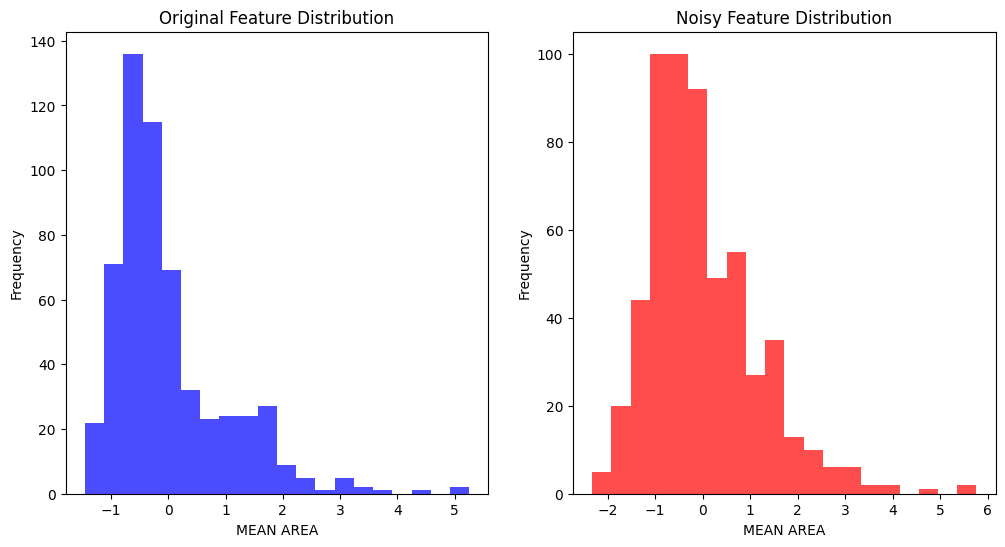

In [29]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
plt.hist(df[feature_names[3]], bins = 20, alpha = 0.7, color = 'blue', label = 'Original' )
plt.title('Original Feature Distribution')
plt.xlabel(feature_names[3].upper())
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(df_noisy[feature_names[3]], bins = 20, alpha = 0.7, color = 'red', label = 'Noisy' )
plt.title('Noisy Feature Distribution')
plt.xlabel(feature_names[3].upper())
plt.ylabel('Frequency')


plt.show()

## Plots

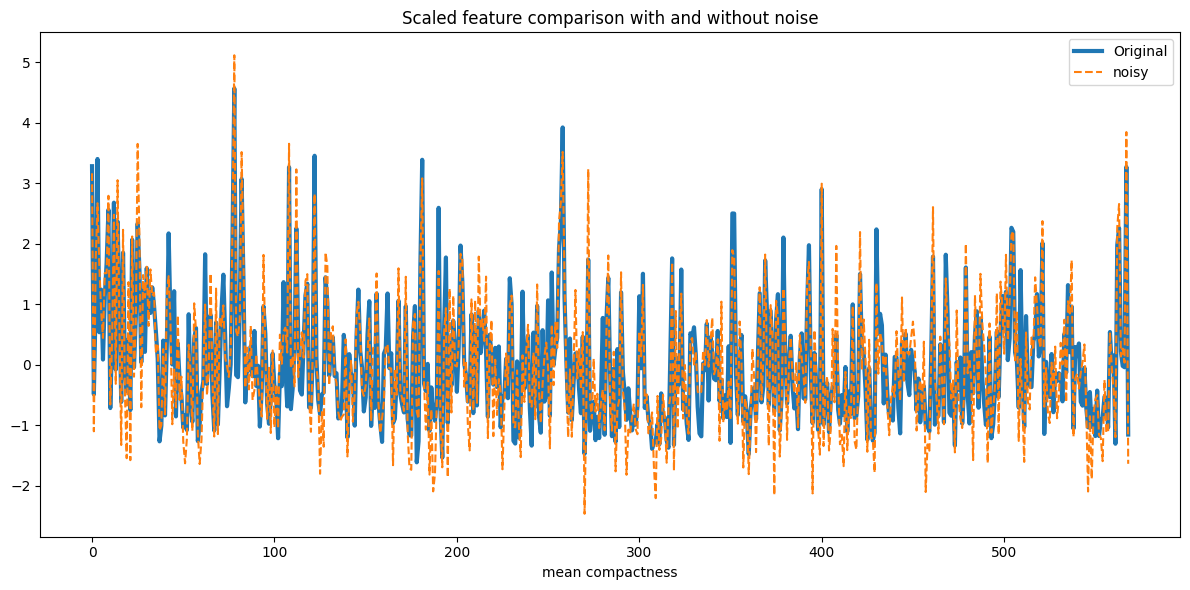

In [33]:
plt.figure(figsize = (12,6))
plt.plot(df[feature_names[5]], label = 'Original', lw = 3)
plt.plot(df_noisy[feature_names[5]],'--', label = 'noisy')
plt.title('Scaled feature comparison with and without noise')
plt.xlabel(feature_names[5])
plt.tight_layout()
plt.legend()
plt.show()

## Scatterplot

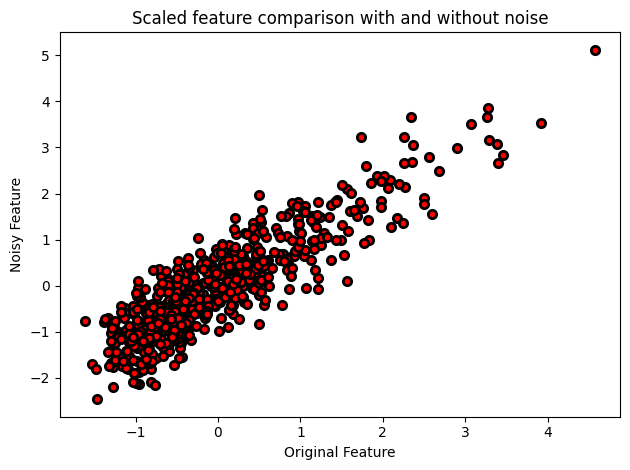

In [40]:
plt.scatter(df[feature_names[5]], df_noisy[feature_names[5]], lw = 2,c = 'r', ec = 'k')
plt.title('Scaled feature comparison with and without noise')
plt.xlabel('Original Feature')
plt.ylabel('Noisy Feature')
plt.tight_layout()
plt.show()

## Split the dataset

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,label, test_size=0.2, random_state=42)


X_noisy = df_noisy.to_numpy()

In [48]:
X_noisy.shape

(569, 30)

In [49]:
X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy = train_test_split(X_noisy, label, test_size=0.2, random_state=42 )

In [50]:
X_train.shape, X_train_noisy.shape

((455, 30), (455, 30))

In [51]:
# initialize the models
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
train_knn = knn.fit(X_train, y_train)

from sklearn.svm import SVC
svm = SVC(kernel = 'linear', C = 1, random_state=42)
train_svm = svm.fit(X_train, y_train)

## Evaluate the Model

In [52]:
y_pred_knn = train_knn.predict(X_test)
y_pred_svm = train_svm.predict(X_test)

## Print the accuracy Scores and Classification reports for both models

In [53]:
print(f"KNN Testing Accuracy: {accuracy_score(y_test, y_pred_knn):.3f}")
print(f"Svm Testing Accuracy: {accuracy_score(y_test, y_pred_svm):.3f}")


from sklearn.metrics import classification_report
print("\nKNN Testing Data Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nSVM Testing Data Classification Report:")
print(classification_report(y_test, y_pred_svm))

KNN Testing Accuracy: 0.947
Svm Testing Accuracy: 0.956

KNN Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


SVM Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [55]:
labels = data.target_names

In [56]:
labels

array(['malignant', 'benign'], dtype='<U9')

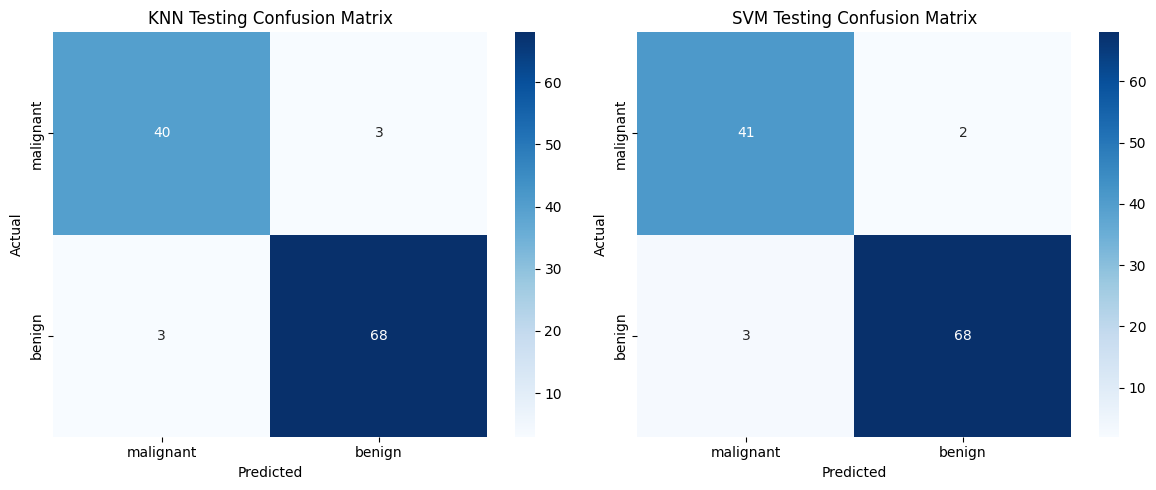

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
fig, axes = plt.subplots(1, 2, figsize = (12,5))

sns.heatmap(conf_matrix_knn, annot = True, cmap = 'Blues', fmt = 'd', ax = axes[0],
           xticklabels = labels, yticklabels = labels)


axes[0].set_title('KNN Testing Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')


sns.heatmap(conf_matrix_svm, annot = True, fmt = 'd', cmap = 'Blues', ax = axes[1],
           xticklabels=labels, yticklabels=labels)

axes[1].set_title('SVM Testing Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

malignant --> positive
benign --> negative
it would be worse to have cancer but being undetected 
so false negative would be worsen the situation.

In this case knn has 3 false negative, but SVM has 2. 
- So SVM did the job better

## Obtain the prediction result using the training data

In [64]:
y_pred_train_knn = knn.predict(X_train)
y_pred_train_svm = svm.predict(X_train)

In [65]:
# Evaluate the models on the training data
print(f"KNN Training Accuracy: {accuracy_score(y_train, y_pred_train_knn):.3f}")
print(f"SVM Training Accuracy: {accuracy_score(y_train, y_pred_train_svm):.3f}")

print("\nKNN Training Classification Report:")
print(classification_report(y_train, y_pred_train_knn))

print("\nSVM Training Classification Report:")
print(classification_report(y_train, y_pred_train_svm))

KNN Training Accuracy: 0.980
SVM Training Accuracy: 0.987

KNN Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       169
           1       0.97      1.00      0.98       286

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.98       455
weighted avg       0.98      0.98      0.98       455


SVM Training Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       169
           1       0.99      0.99      0.99       286

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



## Plot the confusion matrices for the training data

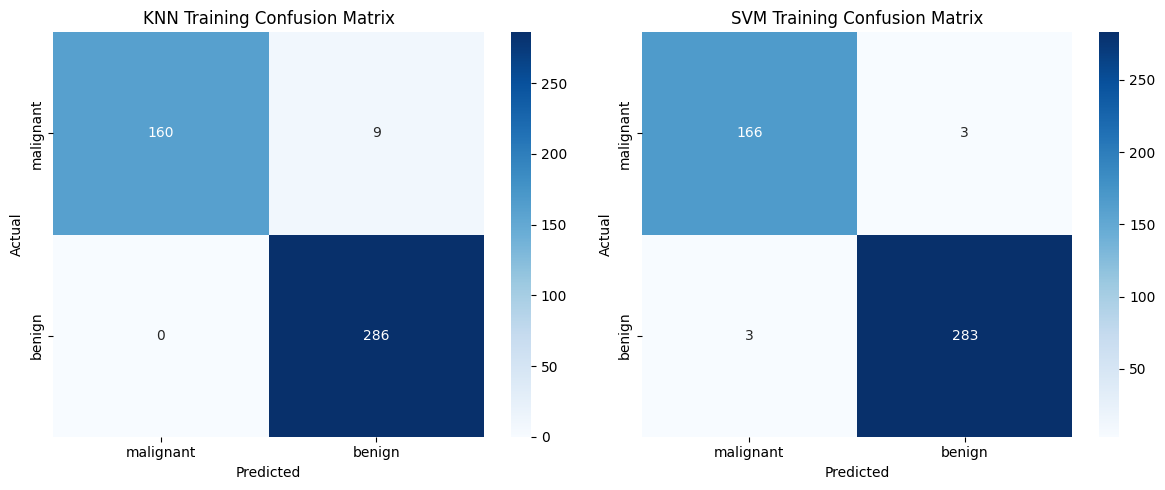

In [67]:
# Enter your code here
conf_matrix_knn = confusion_matrix(y_train, y_pred_train_knn)
conf_matrix_svm = confusion_matrix(y_train, y_pred_train_svm)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='d', ax=axes[0],
            xticklabels=labels, yticklabels=labels)

axes[0].set_title('KNN Training Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d', ax=axes[1],
            xticklabels=labels, yticklabels=labels)
axes[1].set_title('SVM Training Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()